In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Read Data

In [2]:
data = pd.read_excel('MullinsEffect(48).xlsx',sheet_name=['Monotonous Loading','Cyclic Loading'])

# MonoLoading Data

In [3]:
MonoLoading_df = data['Monotonous Loading']

In [4]:
MonoLoading_df = MonoLoading_df.drop(columns=['Unnamed: 3','Cross-head displacement rate','0.125 mm/sec'])

In [5]:
MonoLoading_df

,Position (mm),Force (N),Time (sec)
0,0.000,0.000000,0.303
1,0.002,0.033333,0.347
2,0.004,0.060000,0.369
3,0.006,0.071429,0.391
4,0.007,0.077778,0.413
...,...,...,...
14931,47.500,34.544444,381.000
14932,47.500,32.414286,381.000
14933,47.500,28.580000,381.000
14934,47.500,19.966667,381.000


# Cyclic Loading Data

In [6]:
CyclicLoading_df = data['Cyclic Loading']

In [7]:
CyclicLoading_df = CyclicLoading_df.drop(columns=['Unnamed: 3',	'Displacement Amplitude',	'7.2 mm'])

In [8]:
CyclicLoading_df

,Position (mm),Force (N),Time (sec)
0,0.093,0.0,1.19
1,0.222,0.4,2.21
2,0.349,0.7,3.22
3,0.475,1.0,4.23
4,0.602,1.3,5.25
...,...,...,...
617,9.490,16.3,618.00
618,9.620,16.5,619.00
619,9.740,16.7,620.00
620,9.870,16.9,621.00


In [9]:
Displacement_amplitude = 7.2    # mm

# Specimen Dimension

![specimen](specimen.PNG)

In [10]:
T = 2.50  # Thickness (mm)
W = 6     # width of narrow section (mm)
L = 33    # length of narrow section (mm)
D = 65    # Distance btw grips (mm)
G = 25    # gauge length (mm)

# Nominal Stress
> $$
  NominalStress = \frac{Force}{Initial Area} \\
$$
>
> $$ Area(A) = Thicness(T) * WidthofNarrowSsection(W) $$

In [11]:
A = T*W*pow(10,-6)    # Initial Area

# Nominal Stress

> $$ NominalStress = \frac{Force}{Initial Area} $$

In [12]:
def stress(df,force,initial_area):
    Stress = np.array(df[force])/initial_area
    df['Nominal Stress (Pa)'] = Stress

In [13]:
stress(MonoLoading_df,'Force (N)',A)
stress(CyclicLoading_df,'Force (N)',A)

# Stretch

> $$ Stretch = \frac{ExtendedGaugeLength}{InitialGaugeLength} = \frac{G'}{G} $$

In [14]:
def Stretch(df,position,initial_gauge_length):
    stretch = (np.array(df[position])+initial_gauge_length)/initial_gauge_length
    df['Stretch'] = stretch

In [15]:
Stretch(MonoLoading_df,'Position (mm)',G)
Stretch(CyclicLoading_df,'Position (mm)',G)

In [16]:
MonoLoading_df

,Position (mm),Force (N),Time (sec),Nominal Stress (Pa),Stretch
0,0.000,0.000000,0.303,0.000000e+00,1.00000
1,0.002,0.033333,0.347,2.222222e+03,1.00008
2,0.004,0.060000,0.369,4.000000e+03,1.00016
3,0.006,0.071429,0.391,4.761905e+03,1.00024
4,0.007,0.077778,0.413,5.185185e+03,1.00028
...,...,...,...,...,...
14931,47.500,34.544444,381.000,2.302963e+06,2.90000
14932,47.500,32.414286,381.000,2.160952e+06,2.90000
14933,47.500,28.580000,381.000,1.905333e+06,2.90000
14934,47.500,19.966667,381.000,1.331111e+06,2.90000


In [17]:
CyclicLoading_df

,Position (mm),Force (N),Time (sec),Nominal Stress (Pa),Stretch
0,0.093,0.0,1.19,0.000000e+00,1.00372
1,0.222,0.4,2.21,2.666667e+04,1.00888
2,0.349,0.7,3.22,4.666667e+04,1.01396
3,0.475,1.0,4.23,6.666667e+04,1.01900
4,0.602,1.3,5.25,8.666667e+04,1.02408
...,...,...,...,...,...
617,9.490,16.3,618.00,1.086667e+06,1.37960
618,9.620,16.5,619.00,1.100000e+06,1.38480
619,9.740,16.7,620.00,1.113333e+06,1.38960
620,9.870,16.9,621.00,1.126667e+06,1.39480


# Data Visualization

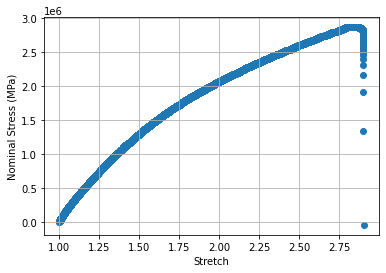

In [18]:
plt.scatter(data=MonoLoading_df, x = 'Stretch', y = 'Nominal Stress (Pa)');
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (MPa)');
plt.grid();

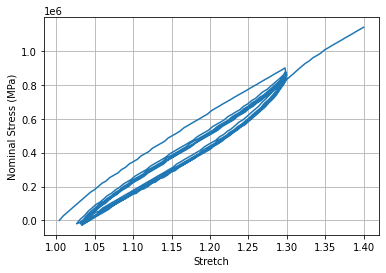

In [19]:
plt.plot(CyclicLoading_df['Stretch'], CyclicLoading_df['Nominal Stress (Pa)']);
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (MPa)');
plt.grid();

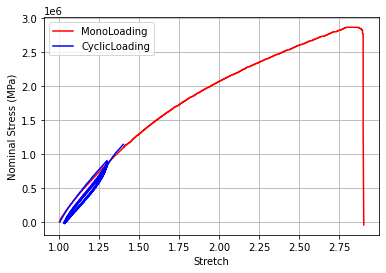

In [20]:
plt.plot(MonoLoading_df['Stretch'],MonoLoading_df['Nominal Stress (Pa)'],'r',CyclicLoading_df['Stretch'],CyclicLoading_df['Nominal Stress (Pa)'],'b');
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (MPa)');
plt.grid();
plt.legend(['MonoLoading','CyclicLoading']);

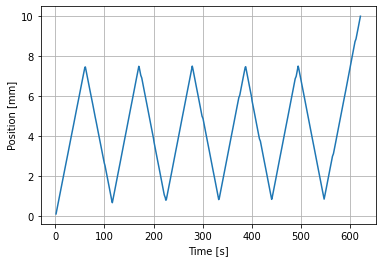

In [21]:
plt.plot(CyclicLoading_df['Time (sec)'], CyclicLoading_df['Position (mm)']);
plt.xlabel('Time [s]'); 
plt.ylabel('Position [mm]');
plt.grid();

## Cycle 1

In [22]:
stretch_C1 = CyclicLoading_df['Stretch'].head(116)
stress_C1 = CyclicLoading_df['Nominal Stress (Pa)'].head(116)

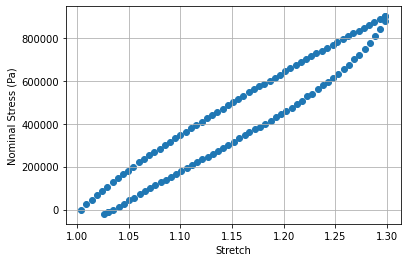

In [23]:
plt.scatter(x=stretch_C1,y=stress_C1);
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (Pa)');
plt.grid();

In [24]:
energy_C1 = np.trapz(y=stress_C1.head(60),x=stretch_C1.head(60)) - np.trapz(y= stress_C1[stress_C1.index > 60], x = stretch_C1[stretch_C1.index> 60])
energy_C1

237814.1333333331

# Cycle 2

In [25]:
stretch_C2 = CyclicLoading_df['Stretch'][116:225]
stress_C2 = CyclicLoading_df['Nominal Stress (Pa)'][116:225]

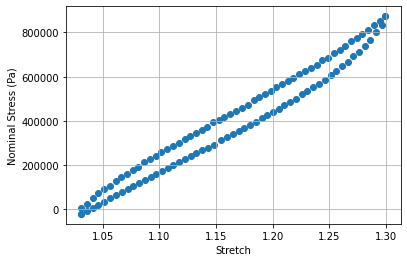

In [26]:
plt.scatter(x=stretch_C2,y=stress_C2);
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (Pa)');
plt.grid();

In [27]:
energy_C2 = np.trapz(y=stress_C2.head(55),x=stretch_C2.head(55)) - np.trapz(y= stress_C2[stress_C2.index > 55], x = stretch_C2[stretch_C2.index> 55])
energy_C2

96480.26666666665

# Cycle 3

In [28]:
stretch_C3 = CyclicLoading_df['Stretch'][225:334]
stress_C3 = CyclicLoading_df['Nominal Stress (Pa)'][225:334]

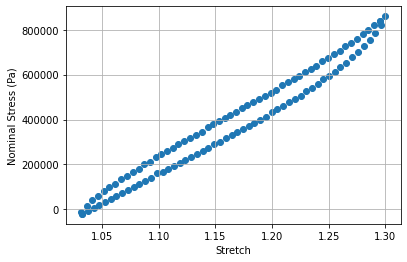

In [29]:
plt.scatter(x=stretch_C3,y=stress_C3);
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (Pa)');
plt.grid();

In [30]:
energy_C3 = np.trapz(y=stress_C3.head(55),x=stretch_C3.head(55)) - np.trapz(y= stress_C3[stress_C3.index > 55], x = stretch_C3[stretch_C3.index> 55])
energy_C3

94729.59999999993

# Cycle 4

In [31]:
stretch_C4 = CyclicLoading_df['Stretch'][334:442]
stress_C4 = CyclicLoading_df['Nominal Stress (Pa)'][334:442]

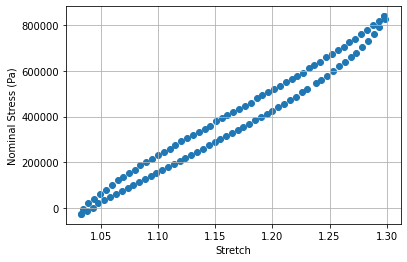

In [32]:
plt.scatter(x=stretch_C4,y=stress_C4);
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (Pa)');
plt.grid();

In [33]:
energy_C4 = np.trapz(y=stress_C4.head(54),x=stretch_C4.head(54)) - np.trapz(y= stress_C4[stress_C4.index > 54], x = stretch_C4[stretch_C4.index> 54])
energy_C4

91483.73333333313

# Cycle 5

In [34]:
stretch_C5 = CyclicLoading_df['Stretch'][334:550]
stress_C5 = CyclicLoading_df['Nominal Stress (Pa)'][334:550]

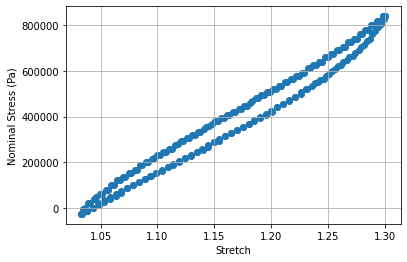

In [35]:
plt.scatter(x=stretch_C5,y=stress_C5);
plt.xlabel('Stretch'); 
plt.ylabel('Nominal Stress (Pa)');
plt.grid();

In [36]:
energy_C5 = np.trapz(y=stress_C5.head(54),x=stretch_C5.head(54)) - np.trapz(y= stress_C5[stress_C5.index > 54], x = stretch_C5[stretch_C5.index> 54])
energy_C5

72890.26666666649

# Cycle's Graph

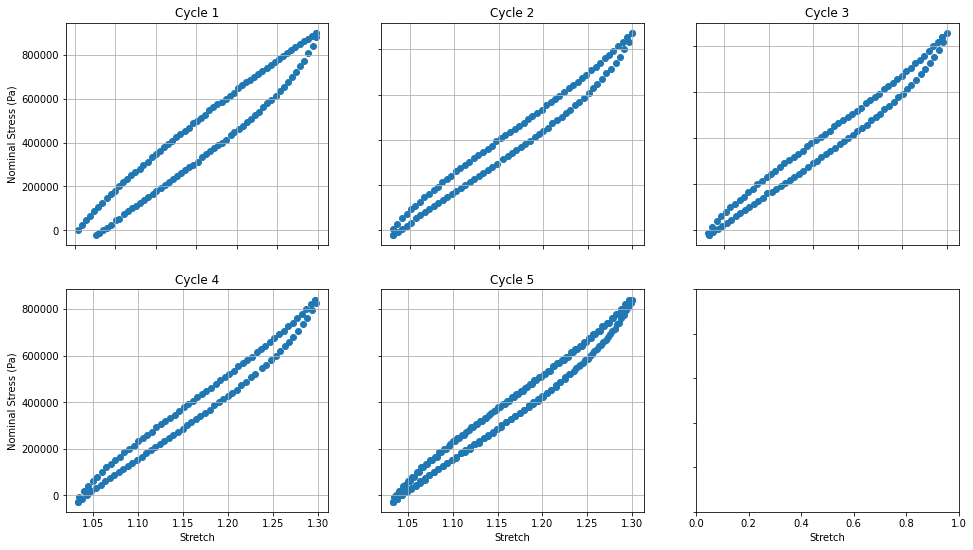

In [46]:
# plt.figure(figsize=(20,10));
fig ,axes = plt.subplots(2,3,figsize = (16,9))

axes[0,0].scatter(x=stretch_C1,y=stress_C1)
axes[0,0].set_title('Cycle 1')
axes[0,0].grid()

axes[0,1].scatter(x=stretch_C2,y=stress_C2)
axes[0,1].set_title('Cycle 2')
axes[0,1].grid()

axes[0,2].scatter(x=stretch_C3,y=stress_C3)
axes[0,2].set_title('Cycle 3')
axes[0,2].grid()

axes[1,0].scatter(x=stretch_C4,y=stress_C4)
axes[1,0].set_title('Cycle 4')
axes[1,0].grid()

axes[1,1].scatter(x=stretch_C5,y=stress_C5)
axes[1,1].set_title('Cycle 5')
axes[1,1].grid();

for ax in axes.flat:
    ax.set(xlabel='Stretch', ylabel='Nominal Stress (Pa)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()



# Energy Dissipation per Cycle

In [38]:
Energy_Diss = [energy_C1,energy_C2,energy_C3,energy_C4,energy_C5]

In [39]:
Cycle = ['cycle 1','cycle 2','cycle 3','cycle 4','cycle 5']
column = ['Energy Dissipation [J]']

In [40]:
df = pd.DataFrame(
    index= Cycle,
    data = Energy_Diss,
    columns=column
)

In [41]:
df

,Energy Dissipation [J]
cycle 1,237814.133333
cycle 2,96480.266667
cycle 3,94729.600000
cycle 4,91483.733333
cycle 5,72890.266667


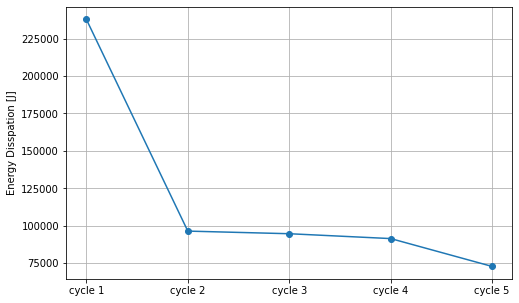

In [42]:
plt.figure(figsize=(8,5));
plt.plot(df,'-o');
# plt.xlabel('Cycle');
plt.ylabel('Energy Disspation [J]');
plt.grid();